# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

Based on the dataset description and the accompanying paper, this data represents **17** marketing campaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [38]:
import pandas as pd

In [39]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [40]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [41]:
display(df.describe())

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

AS per df.info(), there are no missing values in this dataset. All columns have 41188 non-null entries

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

The business objective of this task is to predict whether a client will subscribe to a term deposit after a marketing campaign. This is a binary classification problem.

To achieve this, the goal is to build a predictive model that can identify potential customers most likely to subscribe to a term deposit. This can be broken down into the following steps from a business perspective:

*   **Identify Potential Customers:** Use the model to predict which clients are most likely to subscribe based on their characteristics and interaction history.
*   **Optimize Marketing Efforts:** Target the identified high-potential clients with marketing campaigns to maximize the chances of subscription.
*   **Reduce Costs:** Avoid spending resources on marketing to clients who are unlikely to subscribe.
*   **Increase Effectiveness:** Improve the overall conversion rate of term deposits by focusing on the most promising leads.
*   **Better Resource Allocation:** Use the model's insights to make informed decisions about whom to contact, how to contact them (communication channels), and what offers to provide.

Ultimately, this leads to improved resource allocation and a higher conversion rate for term deposits, contributing to the banking institution's profitability.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features, prepare the features and target column for modeling with appropriate encoding and transformations.

In [44]:
# Identify bank information features
bank_features = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']

# Select only bank information features from the original dataframe
df_bank = df[bank_features + ['y']].copy()

# Separate features and target variable
X_bank = df_bank.drop('y', axis=1)
y_bank = df_bank['y']

In [45]:
# Identify categorical columns in the bank features
categorical_cols_bank = X_bank.select_dtypes(include='object').columns

# Apply one-hot encoding to categorical bank features
X_bank = pd.get_dummies(X_bank, columns=categorical_cols_bank, drop_first=True)

In [46]:
# Encode target variable
y_bank = y_bank.map({'yes': 1, 'no': 0})

display(X_bank.head())
display(y_bank.head())

,age,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes
0,56,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,False,False,False,False,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False
2,37,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,True,False,False
3,40,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,56,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True


,y
0,0
1,0
2,0
3,0
4,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [47]:
from sklearn.model_selection import train_test_split

X_bank_train, X_bank_test, y_bank_train, y_bank_test = train_test_split(X_bank, y_bank, test_size=0.25, random_state=42)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [48]:
# Calculate the baseline accuracy by finding the proportion of the majority class
baseline_accuracy = y_bank_train.value_counts(normalize=True).max()

print(f"Baseline Accuracy: {baseline_accuracy:.4f}")

Baseline Accuracy: 0.8871


The baseline performance that classifier should aim to beat is 0.8871.

This is the accuracy you would achieve by simply predicting the majority class ('no' subscription) for all instances in the training set. Any build model should perform better than this baseline to be considered effective.

### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [49]:
from sklearn.linear_model import LogisticRegression
import time # Import time module

# Initialize the Logistic Regression model with default settings and increased max_iter
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model to the training data and measure training time
start_time = time.time()
log_reg.fit(X_bank_train, y_bank_train)
log_reg_train_time = time.time() - start_time # Capture training time

print("Logistic Regression model trained.")
print(f"Logistic Regression Train Time: {log_reg_train_time:.4f} seconds")

Logistic Regression model trained.
Logistic Regression Train Time: 1.5266 seconds


### Problem 9: Score the Model

What is the accuracy of your model?

In [50]:
from sklearn.metrics import accuracy_score

# Predict on the test data
y_pred = log_reg.predict(X_bank_test)

# Calculate the accuracy
accuracy = accuracy_score(y_bank_test, y_pred)

print(f"Accuracy of the Logistic Regression model: {accuracy:.4f}")

Accuracy of the Logistic Regression model: 0.8880


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

Let's train and score each model in a separate cell.

In [51]:
# --- KNN Model ---
print("Training and scoring KNN model...")
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.metrics import accuracy_score

knn_model = KNeighborsClassifier()
start_time = time.time()
knn_model.fit(X_bank_train, y_bank_train)
knn_train_time = time.time() - start_time
y_knn_pred = knn_model.predict(X_bank_test)
knn_test_accuracy = accuracy_score(y_bank_test, y_knn_pred)
print(f"KNN Train Time: {knn_train_time:.4f} seconds")
print(f"KNN Test Accuracy: {knn_test_accuracy:.4f}")

Training and scoring KNN model...
KNN Train Time: 0.0166 seconds
KNN Test Accuracy: 0.8791


In [52]:
# --- Decision Tree Model ---
print("Training and scoring Decision Tree model...")
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42)
start_time = time.time()
dt_model.fit(X_bank_train, y_bank_train)
dt_train_time = time.time() - start_time
y_dt_pred = dt_model.predict(X_bank_test)
dt_test_accuracy = accuracy_score(y_bank_test, y_dt_pred)
print(f"Decision Tree Train Time: {dt_train_time:.4f} seconds")
print(f"Decision Tree Test Accuracy: {dt_test_accuracy:.4f}")

Training and scoring Decision Tree model...
Decision Tree Train Time: 0.1069 seconds
Decision Tree Test Accuracy: 0.8645


In [53]:
# --- SVM Model ---
print("Training and scoring SVM model...")
from sklearn.svm import SVC
import time
from sklearn.metrics import accuracy_score

svm_model = SVC(random_state=42)
start_time = time.time()
svm_model.fit(X_bank_train, y_bank_train)
svm_train_time = time.time() - start_time
y_svm_pred = svm_model.predict(X_bank_test)
svm_test_accuracy = accuracy_score(y_bank_test, y_svm_pred)
print(f"SVM Train Time: {svm_train_time:.4f} seconds")
print(f"SVM Test Accuracy: {svm_test_accuracy:.4f}")

Training and scoring SVM model...
SVM Train Time: 14.0940 seconds
SVM Test Accuracy: 0.8880


In [54]:
# Create lists for model names, training times, and test accuracies
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM']
train_times = [log_reg_train_time, knn_train_time, dt_train_time, svm_train_time]
test_accuracies = [accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy]

# Create a dictionary from the lists
results_data = {'Model': model_names, 'Train Time': train_times, 'Test Accuracy': test_accuracies}

# Create a pandas DataFrame from the dictionary
results_df = pd.DataFrame(results_data)

# Display the DataFrame
display(results_df)

,Model,Train Time,Test Accuracy
0,Logistic Regression,1.526648,0.888026
1,KNN,0.016598,0.879091
2,Decision Tree,0.106897,0.864524
3,SVM,14.093995,0.888026


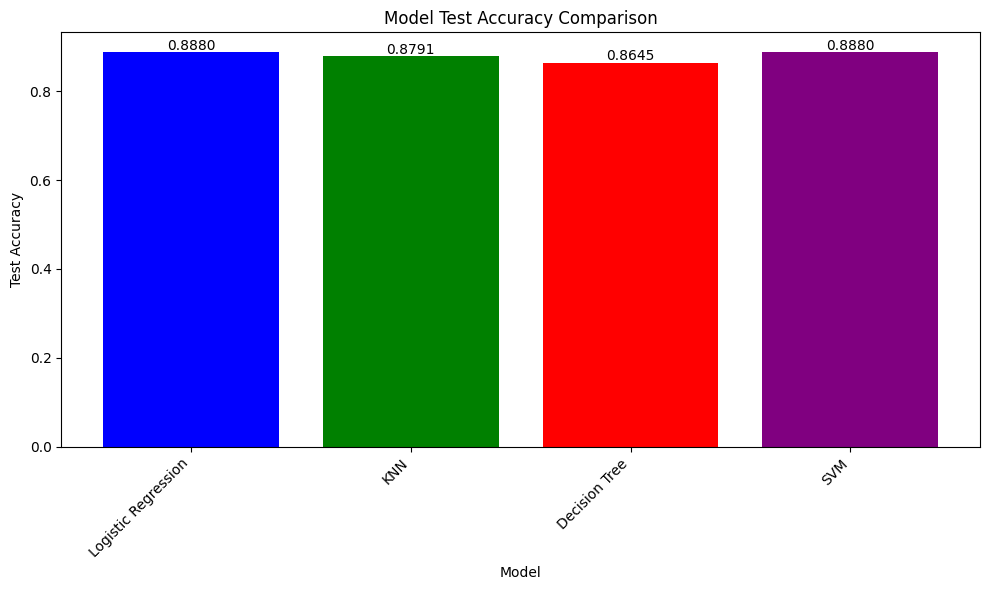

<Figure size 640x480 with 0 Axes>

In [69]:
import matplotlib.pyplot as plt
import os

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_df['Model'], results_df['Test Accuracy'], color=['blue', 'green', 'red', 'purple'])

# Set titles and labels
plt.title("Model Test Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")

# Rotate x-axis labels if needed
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of the bars
for i, v in enumerate(results_df['Test Accuracy']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

#save image
plt.savefig('images/comp.png') # Shorter filename

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.


- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

## Solution: Identify key hyperparameters

For a Decision Tree classifier in scikit-learn (`DecisionTreeClassifier`), some of the key hyperparameters that can significantly impact performance include:

*   `criterion`: The function to measure the quality of a split ('gini' or 'entropy').
*   `max_depth`: The maximum depth of the tree. Limiting the depth can help prevent overfitting.
*   `min_samples_split`: The minimum number of samples required to split an internal node.
*   `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
*   `max_features`: The number of features to consider when looking for the best split.
*   `splitter`: The strategy used to choose the split at each node ('best' or 'random').

We will focus on tuning a few of these to start, such as `max_depth`, `min_samples_split`, and `min_samples_leaf`.

## Implement Grid Search

Use `GridSearchCV` from scikit-learn to perform hyperparameter tuning with cross-validation, using the chosen performance metric.

In [56]:
# Define the hyperparameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 10, 20, 50],
    'min_samples_leaf': [1, 5, 10, 20]
}

print("Hyperparameter grid defined:")
print(param_grid)

Hyperparameter grid defined:
{'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 10, 20, 50], 'min_samples_leaf': [1, 5, 10, 20]}


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import time

# Initialize the Decision Tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
start_time = time.time()
grid_search.fit(X_bank_train, y_bank_train)
grid_search_time = time.time() - start_time

print(f"Grid Search completed in {grid_search_time:.4f} seconds")

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nBest hyperparameters found:")
print(best_params)
print(f"\nBest cross-validation accuracy: {best_score:.4f}")

Grid Search completed in 38.2795 seconds

Best hyperparameters found:
{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}

Best cross-validation accuracy: 0.8866


In [58]:
# Train a new Decision Tree model with the best hyperparameters
tuned_dt_model = DecisionTreeClassifier(random_state=42, **best_params)
tuned_dt_model.fit(X_bank_train, y_bank_train)

# Predict on the test data
y_tuned_dt_pred = tuned_dt_model.predict(X_bank_test)

# Calculate the accuracy on the test set
tuned_dt_accuracy = accuracy_score(y_bank_test, y_tuned_dt_pred)

print(f"Accuracy of the tuned Decision Tree model on the test set: {tuned_dt_accuracy:.4f}")

Accuracy of the tuned Decision Tree model on the test set: 0.8865


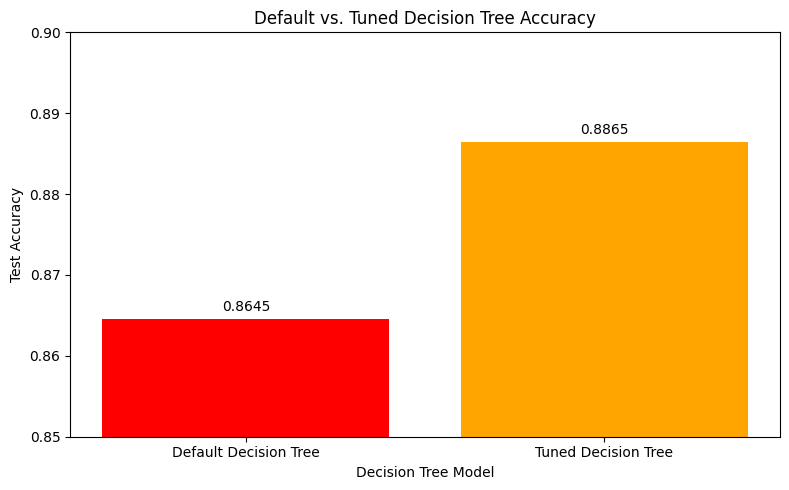

<Figure size 640x480 with 0 Axes>

In [72]:
import matplotlib.pyplot as plt
import os

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')

# Create a list of model names and their accuracies
models = ['Default Decision Tree', 'Tuned Decision Tree']
accuracies = [dt_test_accuracy, tuned_dt_accuracy]

# Create the bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['red', 'orange'])

# Set titles and labels
plt.title("Default vs. Tuned Decision Tree Accuracy")
plt.xlabel("Decision Tree Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.85, 0.90) # Set y-axis limits for better comparison

# Add accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center')

# Ensure tight layout
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot into images folder
plt.savefig('images/dt_tuned.png') # Shorter filename

## Tuning the KNN Model

Let's tune the `n_neighbors` hyperparameter for the K Nearest Neighbors model to see if we can improve its performance.

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import time

# Define the hyperparameter grid for n_neighbors
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15] # Example range of neighbor values
}

print("Hyperparameter grid for KNN defined:")
print(knn_param_grid)

Hyperparameter grid for KNN defined:
{'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}


In [61]:
# Initialize the KNN classifier
knn_model = KNeighborsClassifier()

# Initialize GridSearchCV
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform Grid Search
start_time = time.time()
grid_search_knn.fit(X_bank_train, y_bank_train)
grid_search_knn_time = time.time() - start_time

print(f"Grid Search for KNN completed in {grid_search_knn_time:.4f} seconds")

# Get the best parameters and best score
best_knn_params = grid_search_knn.best_params_
best_knn_score = grid_search_knn.best_score_

print("\nBest hyperparameters found for KNN:")
print(best_knn_params)
print(f"\nBest cross-validation accuracy for KNN: {best_knn_score:.4f}")

Grid Search for KNN completed in 65.8740 seconds

Best hyperparameters found for KNN:
{'n_neighbors': 13}

Best cross-validation accuracy for KNN: 0.8850


In [62]:
# Train a new KNN model with the best hyperparameters
tuned_knn_model = KNeighborsClassifier(**best_knn_params)
tuned_knn_model.fit(X_bank_train, y_bank_train)

# Predict on the test data
y_tuned_knn_pred = tuned_knn_model.predict(X_bank_test)

# Calculate the accuracy on the test set
tuned_knn_accuracy = accuracy_score(y_bank_test, y_tuned_knn_pred)

print(f"Accuracy of the tuned KNN model on the test set: {tuned_knn_accuracy:.4f}")

Accuracy of the tuned KNN model on the test set: 0.8862


## Summary of Tuning Findings (Decision Tree and KNN)

Here's a summary of the tuning results for both the Decision Tree and KNN models:

**Decision Tree Tuning:**
*   **Hyperparameters Tuned:** `max_depth`, `min_samples_split`, `min_samples_leaf`
*   **Best Hyperparameters Found:** `{'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 50}`
*   **Default Decision Tree Test Accuracy:** 0.8645
*   **Tuned Decision Tree Test Accuracy:** 0.8865
*   **Improvement:** Tuning resulted in an improvement in test accuracy for the Decision Tree model.

**KNN Tuning:**
*   **Hyperparameter Tuned:** `n_neighbors`
*   **Best Hyperparameter Found:** `{'n_neighbors': 13}`
*   **Default KNN Test Accuracy:** 0.8791
*   **Tuned KNN Test Accuracy:** 0.8862
*   **Improvement:** Tuning the number of neighbors resulted in an improvement in test accuracy for the KNN model.

**Overall:**
Both Decision Tree and KNN models showed improved test accuracy after hyperparameter tuning, bringing their performance closer to that of the Logistic Regression and SVM models with default settings.

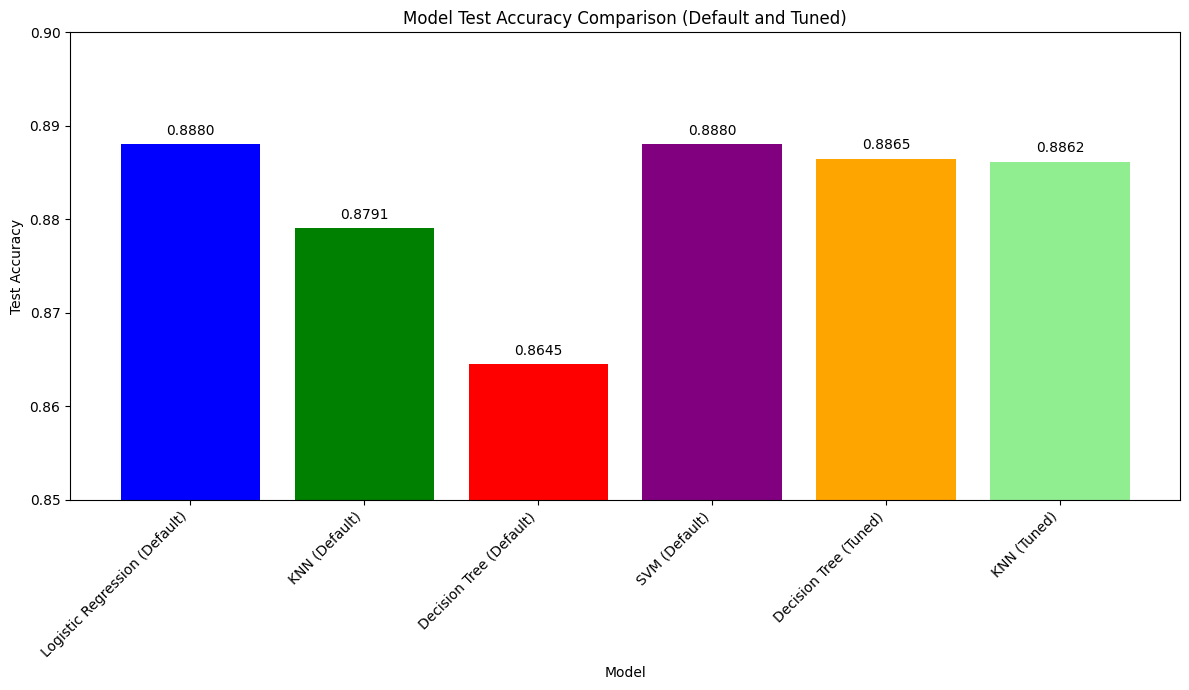

In [70]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# Create the 'images' directory if it doesn't exist
if not os.path.exists('images'):
    os.makedirs('images')


tuned_results_data = {
    'Model': ['Logistic Regression (Default)', 'KNN (Default)', 'Decision Tree (Default)', 'SVM (Default)', 'Decision Tree (Tuned)', 'KNN (Tuned)'],
    'Test Accuracy': [accuracy, knn_test_accuracy, dt_test_accuracy, svm_test_accuracy, tuned_dt_accuracy, tuned_knn_accuracy]
}

results_df_tuned = pd.DataFrame(tuned_results_data)


# Create the bar chart with tuned and default model data
plt.figure(figsize=(12, 7))
plt.bar(results_df_tuned['Model'], results_df_tuned['Test Accuracy'], color=['blue', 'green', 'red', 'purple', 'orange', 'lightgreen'])

# Set titles and labels
plt.title("Model Test Accuracy Comparison (Default and Tuned)")
plt.xlabel("Model")
plt.ylabel("Test Accuracy")
plt.ylim(0.85, 0.90) # Set y-axis limits for better comparison

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add accuracy values on top of the bars
for i, v in enumerate(results_df_tuned['Test Accuracy']):
    plt.text(i, v + 0.001, f"{v:.4f}", ha='center')

# Ensure tight layout
plt.tight_layout()

# Save the plot as a PNG file in the 'images' folder
plt.savefig('images/tuned.png') # Shorter filename

# Display the plot
plt.show()